In [2]:
import os
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.utils import resample
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

## Read Data

In [3]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'status', 'occupation', 'relationship',
       'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income-class']

df = pd.read_csv('adult.data', names=cols)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Overall Inspection

In [3]:
# check data types of each column
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
status            object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income-class      object
dtype: object

In [6]:
# take a look at a obejct-type value in the table.
# it's obvious that there are leading whitespaces in it, which can be annoying later on.
df.loc[0, 'income-class']

' <=50K'

In [7]:
# remove leading and trailing whitespaces in values that have strings
string_df = df.select_dtypes(include='object')
df[string_df.columns] = string_df.apply(lambda x: x.str.strip())
df.head()

,age,workclass,fnlwgt,education,education-num,status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
# check if there are missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
status            0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income-class      0
dtype: int64

# Descriptive Analysis (Univariate)

## Numeric Variables

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From the summary above, we have several findings:
1. The majority of data in capital-gain and capital-loss is 0. 
2. 99999 in capital-gain looks suspicious, it might be a default value when there's no entry of data.
3. Minimum hours-per-week is 1 hour, and maximum hours-per-week is 99 hours. Both can be outliers.

In order to identify outliers in these numeric columns, we need to draw histograms and boxplots to check their distributions. To save space on this page, the histograms are not printed.

In [1]:
# histogram and boxplot for numeric columns
# num_df = df.select_dtypes(include=np.number)
# num_cols = num_df.shape[1]
# plot_height = 3
# plot_width = 8
# fig, axes = plt.subplots(nrows=num_cols, sharey=True, figsize=(plot_width, num_cols*plot_height))

# for idx, col in enumerate(num_df.columns):
#     ax = axes[idx]
#     sns.distplot(num_df[col], kde=False , ax=ax)
#     #ax.hist(num_df[col], bins=20)
#     ax.set_title('Histogram of %s' % col, fontweight='bold')
    
# plt.tight_layout()

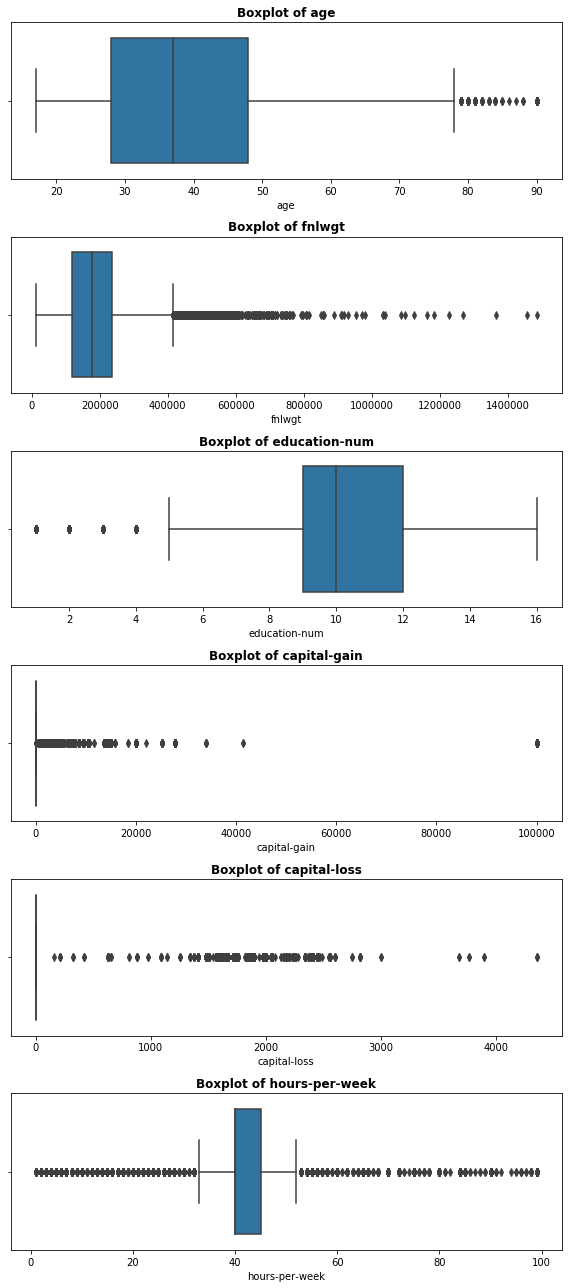

In [109]:
fig, axes = plt.subplots(nrows=num_cols, sharey=True, figsize=(plot_width, num_cols*plot_height))

for idx, col in enumerate(num_df.columns):
    ax = axes[idx]
    sns.boxplot(num_df[col], ax=ax)
    ax.set_title('Boxplot of %s' % col, fontweight='bold')

plt.tight_layout()

The plots above suggest that:
1. The distribution of all numeric columns are very skewed.
2. All numeric columns have data points that fall out of normal ranges.

Since we don't have more detailed information about the dataset, we want to be conservative at this point and don't take any actions on the outliers suggested by the boxplots.  
However, we can process the two special columns: capital-gain and capital-loss where most values are zero. To not lose information that is potentially useful, we create new columns that indicate whether the values are zero or not instead of removing abnormal values or imputing them with zero, and remove column capital-gain and column capital-loss.

In [9]:
# create two indicator columns
df['capital-gain-zero'] = 1
df.loc[df['capital-gain'] > 0, 'capital-gain-zero'] = 0
df['capital-loss-zero'] = 1
df.loc[df['capital-loss'] > 0, 'capital-loss-zero'] = 0

In [10]:
df['capital-gain-zero'].value_counts()

1    29849
0     2712
Name: capital-gain-zero, dtype: int64

In [11]:
df['capital-loss-zero'].value_counts()

1    31042
0     1519
Name: capital-loss-zero, dtype: int64

## Categorical Variables

In [12]:
# categorical columns
cat_df = df.select_dtypes(include='object')
cat_df.head()

,workclass,education,status,occupation,relationship,race,sex,native-country,income-class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


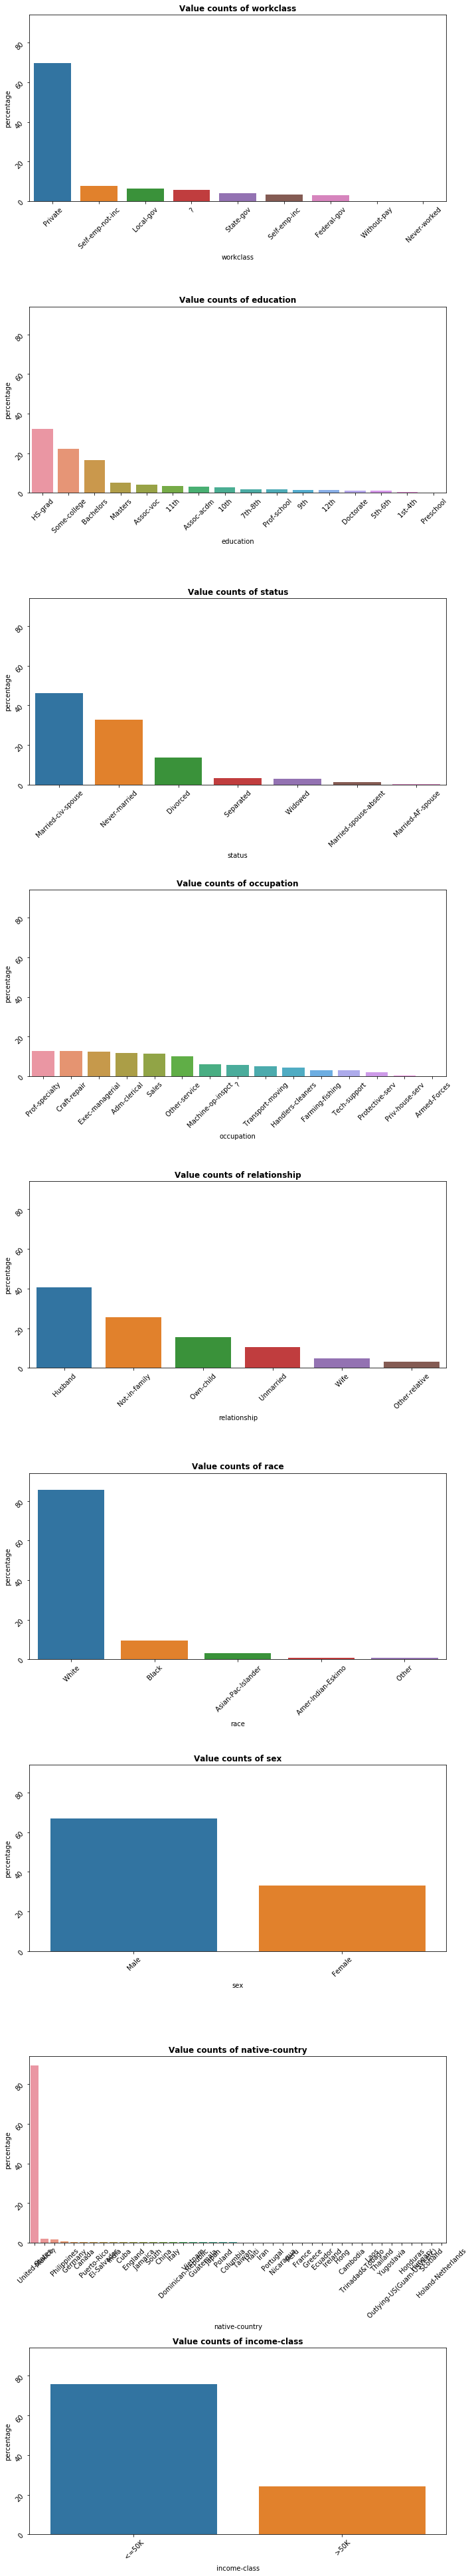

In [83]:
num_cols = cat_df.shape[1]
plot_height = 6
plot_width = 10
#nrows = math.ceil(num_cols/2)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, sharey=True, figsize=(plot_width, num_cols*plot_height))

for idx, col in enumerate(cat_df.columns):
#     row_idx = idx // 2
#     col_idx = idx % 2
    vc = cat_df[col].value_counts()/len(df) * 100
    # ax = axes[row_idx][col_idx]
    ax = axes[idx]
    sns.barplot(x=vc.index, y=vc.values, ax=ax)
    ax.tick_params(labelrotation=45)
    ax.set_title('Value counts of %s' % col, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('percentage')
plt.tight_layout()

In [84]:
# the bar plot of native country looks messy so we print out value counts here
cat_df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

The bar plots above suggest:
1. Heavily imbalanced distributions exist in:
    - work class where "private" is the dominant value
    - race where "white" is the dominant value
    - sex where "male" is the dominant value
    - native country where "United States" is the dominant value
    - income-class where "<=50K" is the dominant value, meaning the target variable is imbalanced

2. Column education and column ducation-num contain the same information
3. Column native-country has a high cardinality
4. "Never-worked" and "Without-pay" in column workclass could be outliers

Therefore, we want to map column education to column education-num and keep only one of them, in this case, education-num as it's already in a numeric format.  
In addition, we will encode "United States" in column native-country as 1 and all the other countries as 0 to handle the high cardinality, and remove column native-country.  
We also need to investigate what income-class that "Never-worked" and "Without-pay" map to.

In [14]:
# Maps education to education-num
education = df[['education', 'education-num']]
education_dict = {}
for val in df['education'].unique():
    num = education[education['education']==val]['education-num'].unique()
    education_dict[num[0]] = val

education_dict

{13: 'Bachelors',
 9: 'HS-grad',
 7: '11th',
 14: 'Masters',
 5: '9th',
 10: 'Some-college',
 12: 'Assoc-acdm',
 11: 'Assoc-voc',
 4: '7th-8th',
 16: 'Doctorate',
 15: 'Prof-school',
 3: '5th-6th',
 6: '10th',
 2: '1st-4th',
 1: 'Preschool',
 8: '12th'}

In [15]:
df['is_USA'] = 1
df.loc[df['native-country'] != 'United-States', 'is_USA'] = 0
df = df.drop(['capital-gain', 'capital-loss', 'native-country', 'education'], axis=1)
df.head()

,age,workclass,fnlwgt,education-num,status,occupation,relationship,race,sex,hours-per-week,income-class,capital-gain-zero,capital-loss-zero,is_USA
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K,0,1,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K,1,1,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K,1,1,1
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K,1,1,1
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K,1,1,0


In [21]:
# How much do "Never-worked" and "Without-pay" earn?
no_pay_df = df.loc[df['workclass'].isin(['Never-worked', 'Without-pay']), ['workclass', 'income-class']]

In [22]:
no_pay_df

,workclass,income-class
1901,Without-pay,<=50K
5361,Never-worked,<=50K
9257,Without-pay,<=50K
10845,Never-worked,<=50K
14772,Never-worked,<=50K
15533,Without-pay,<=50K
15695,Without-pay,<=50K
16812,Without-pay,<=50K
20073,Without-pay,<=50K
20337,Never-worked,<=50K


From the table above, we can see that there are very few instances in data whose workclass are "Without-pay" or "Never-worked". All these instances earn less than 50K dollars.  
Thus, we create a dummy variable "no_pay_or_work" to indicate if a workclass is no pay or not.

In [23]:
df['no_pay_or_work'] = 0
df.loc[df['workclass'].isin(['Never-worked', 'Without-pay']), 'no_pay_or_work'] = 1
df.head()

,age,workclass,fnlwgt,education-num,status,occupation,relationship,race,sex,hours-per-week,income-class,capital-gain-zero,capital-loss-zero,is_USA,no_pay_or_work
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K,0,1,1,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K,1,1,1,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K,1,1,1,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K,1,1,1,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K,1,1,0,0


# Correlation Analysis (Bivariate)

Part 1: Qualitative Analysis
1. Qualitative correlation between two categorical variables
    - Contingency table  
2. Qualitative correlation between a categorical variable and a numeric variable
    - Histogram of the numeric variable per unique value of the categorical variable 
    
Part 2: Quantitative Analysis
1. Quantitative correlation between two categorical variables
    - Chi-square
    - Mutual information
2. Quantitative correlation between a categorical variable and a numeric variable
    - Student T-test
3. Quantitative correlation between two numeric variables
    - Pearson Correlation

## Qualitative Analysis

### Betweeen Categorical Variables

In [24]:
# Investigate the correlation between education-num and income-class given different workclasses
pd.crosstab(df['education-num'], [df['workclass'], df['income-class']])

workclass         ?      Federal-gov      Local-gov      Never-worked Private  \
income-class  <=50K >50K       <=50K >50K     <=50K >50K        <=50K   <=50K   
education-num                                                                   
1                 5    0           0    0         4    0            0      41   
2                12    0           0    0         4    0            0     131   
3                28    2           1    0         8    1            0     259   
4                70    2           2    0        27    1            1     406   
5                50    1           2    1        20    3            0     369   
6                98    2           6    0        30    1            2     648   
7               118    0           8    1        34    2            1     878   
8                38    2           5    0        17    2            0     310   
9               486   46         190   73       413   90            1    6661   
10              479   35         172   82       294   93            2    4171   
11               48   13          23   15        61   25            0     749   
12               41    6          36   19        60   28            0     559   
13              128   45         117   95       315  162            0    2056   
14               30   18          20   47       169  173            0     360   
15               10    8           6   23        10   19            0      86   
16                4   11           1   15        10   17            0      49   

workclass           Self-emp-inc      Self-emp-not-inc      State-gov       \
income-class   >50K        <=50K >50K            <=50K >50K     <=50K >50K   
education-num                                                                
1                 0            0    0                0    0         1    0   
2                 5            2    0               12    1         1    0   
3                 7            2    2               15    4         4    0   
4                18            9    5               80   14        10    0   
5                18           10    0               30    4         6    0   
6                47           16    3               60    7        11    2   
7                45           10    4               53    7        13    1   
8                23            6    1               16    3         8    2   
9              1119          160  119              687  179       219   49   
10              923          110  116              379  107       294   31   
11              256           19   19               87   21        34   12   
12              170           17   18               53   18        35    6   
13             1495          102  171              236  163       180   90   
14              534           22   57               65   59        98   71   
15              171            3   78               25  106        13   18   
16              132            6   29               19   31        18   71   

workclass     Without-pay  
income-class        <=50K  
education-num              
1                       0  
2                       0  
3                       0  
4                       1  
5                       0  
6                       0  
7                       0  
8                       0  
9                       9  
10                      3  
11                      0  
12                      1  
13                      0  
14                      0  
15                      0  
16                      0

**Observation from above:**  
Education level seems to have influences on income. In some workclass, when education-num exceeds 13 (Bachelor), the number of people who earn >50K is more than that of people who earn <=50k.  
Thus, we consider creating a dummy variable to suggest whether a person's education level is above bachelor or not.

In [26]:
# Investigate the correlation between occupation and income-class given different genders
table = pd.crosstab(df['occupation'], [df['sex'], df['income-class']])
# calculate percentages
table[('Female', '>50K percent')] = round(table[('Female', '>50K')] 
                                          / 
                                          (table[('Female', '<=50K')] + table[('Female', '>50K')]) * 100
                                          , 2)

table[('Male', '>50K percent')] = round(table[('Male', '>50K')] 
                                        / 
                                        (table[('Male', '<=50K')] + table[('Male', '>50K')]) * 100
                                        , 2)
table

sex               Female       Male             Female         Male
income-class       <=50K >50K <=50K  >50K >50K percent >50K percent
occupation                                                         
?                    789   52   863   139         6.18        13.87
Adm-clerical        2325  212   938   295         8.36        23.93
Armed-Forces           0    0     8     1          NaN        11.11
Craft-repair         202   20  2968   909         9.01        23.45
Exec-managerial      879  280  1219  1688        24.16        58.07
Farming-fishing       63    2   816   113         3.08        12.16
Handlers-cleaners    160    4  1124    82         2.44         6.80
Machine-op-inspct    530   20  1222   230         3.64        15.84
Other-service       1749   51  1409    86         2.83         5.75
Priv-house-serv      140    1     8     0         0.71         0.00
Prof-specialty      1130  385  1151  1474        25.41        56.15
Protective-serv       66   10   372   201        13.16        35.08
Sales               1175   88  1492   895         6.97        37.49
Tech-support         303   45   342   238        12.93        41.03
Transport-moving      81    9  1196   311        10.00        20.64

**Observation from above:**  
Gender seems to have a big influence on income. On almost all occupations, male have higher income than female. For example, only 8.36% female make more than 50K as adm-clerical whereas 23.93% male make more than 50K in the same occupation.

In [27]:
# Investigate the correlation between occupation and income-class given different races
table = pd.crosstab(df['occupation'], [df['race'], df['income-class']])
# calculate percentages
table[('White',  '>50K percent')] = round(table[('White', '>50K')]
                                          / (table[('White', '<=50K')] + table[('White', '>50K')]) * 100
                                          , 2)

table[('Other',  '>50K percent')] = round(table[('Other', '>50K')]
                                          / (table[('Other', '<=50K')] + table[('Other', '>50K')]) * 100
                                          , 2)

table[('Black',  '>50K percent')] = round(table[('Black', '>50K')]
                                          / (table[('Black', '<=50K')] + table[('Black', '>50K')]) * 100
                                          , 2)

table[('Asian-Pac-Islander',  '>50K percent')] = round(table[('Asian-Pac-Islander', '>50K')]
                                                       / 
                                                 (table[('Asian-Pac-Islander', '<=50K')]
                                                  + table[('Asian-Pac-Islander', '>50K')]) * 100
                                                       , 2)

table[('Amer-Indian-Eskimo',  '>50K percent')] = round(table[('Amer-Indian-Eskimo', '>50K')]
                                                       / 
                                                 (table[('Amer-Indian-Eskimo', '<=50K')]
                                                  + table[('Amer-Indian-Eskimo', '>50K')]) * 100
                                                       , 2)

In [28]:
percent_cols = [col for col in table.columns if 'percent' in col[1]]
table[percent_cols]

race,White,Other,Black,Asian-Pac-Islander,Amer-Indian-Eskimo
income-class,>50K percent,>50K percent,>50K percent,>50K percent,>50K percent
occupation,,,,,
?,11.42,8.70,4.19,7.69,8.00
Adm-clerical,14.23,3.85,8.57,15.83,9.68
Armed-Forces,14.29,NaN,0.00,NaN,0.00
Craft-repair,22.85,17.86,20.08,28.09,13.64
Exec-managerial,49.86,18.18,34.43,45.19,10.00
Farming-fishing,12.35,0.00,0.00,12.50,0.00
Handlers-cleaners,6.53,0.00,6.15,4.35,0.00
Machine-op-inspct,13.47,2.56,8.03,16.95,0.00


**Observation from above:**  
Race seems to have an influence on income. White and Asian-Pac-Islanders have higher income than other races on almost all occupations.

In [57]:
# Investigate the correlation between education-num and race
table = pd.crosstab(df['education-num'], df['race'])
table

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
education-num,,,,,
1,0,6,5,2,38
2,4,5,16,9,134
3,2,18,21,13,278
4,9,11,56,16,551
5,5,9,82,7,385
6,15,13,124,7,634
7,12,20,138,8,817
8,5,9,69,13,300
9,119,225,1171,78,8877


**Observation from above:**  
Asians have an unusually high number in ed level 13 (Bachelor).

### Betweeen Categorical Variables and Numeric Variables

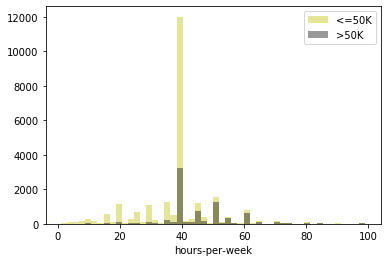

In [33]:
# Hours-per-week vs income-class

# seperate high income group and low income group
low_df = df.loc[df['income-class'] == '<=50K', 'hours-per-week']
high_df = df.loc[df['income-class'] == '>50K', 'hours-per-week']

sns.distplot(low_df, kde=False, color='y', label='<=50K')
sns.distplot(high_df, kde=False, color='k', label='>50K')
plt.legend()

**Observation from above:**  
In high income group, the proportion of people who work more than 40 hours is higher than low income group.

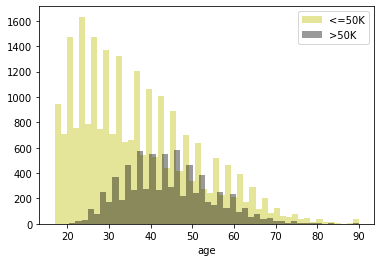

In [34]:
# Hours-per-week vs ge

# seperate high income group and low income group
low_df = df.loc[df['income-class'] == '<=50K', 'age']
high_df = df.loc[df['income-class'] == '>50K', 'age']

sns.distplot(low_df, kde=False, color='y', label='<=50K')
sns.distplot(high_df, kde=False, color='k', label='>50K')
plt.legend()

In [65]:
low_income = df.loc[df['income-class'] == '<=50K', ['age', 'hours-per-week']]
high_income = df.loc[df['income-class'] == '>50K', ['age', 'hours-per-week']]
print('low income')
print(low_income.describe(), '\n')
print('high income')
print(high_income.describe())

low income
                age  hours-per-week
count  24325.000000    24325.000000
mean      37.104995       39.123947
std       13.903084       12.147302
min       18.000000        1.000000
25%       26.000000       36.000000
50%       34.000000       40.000000
75%       46.000000       40.000000
max       90.000000       99.000000 

high income
               age  hours-per-week
count  7682.000000     7682.000000
mean     44.206196       45.383494
std      10.507283       10.964122
min      19.000000        1.000000
25%      36.000000       40.000000
50%      43.000000       40.000000
75%      51.000000       50.000000
max      90.000000       99.000000


**Observation from above:**  
The median age and average age in high income group are both higher than low income group.

## Quantitative Analysis

### Between Categorical Variables

In [45]:
# make a copy of the processed data
copy_df = df.copy()

In [46]:
types = copy_df.dtypes
types

age                   int64
workclass            object
fnlwgt                int64
education-num         int64
status               object
occupation           object
relationship         object
race                 object
sex                  object
hours-per-week        int64
income-class         object
capital-gain-zero     int64
capital-loss-zero     int64
is_USA                int64
no_pay_or_work        int64
dtype: object

In [47]:
# to do quantitative anlaysis, we need to transform non-numeric variables into numeric ones
oe = OrdinalEncoder()
obj_cols = types[types=='object'].index.tolist()
obj_cols.remove('income-class')
print(obj_cols)
copy_df[obj_cols] = oe.fit_transform(copy_df[obj_cols])

le = LabelEncoder()
copy_df['income-class'] = le.fit_transform(copy_df['income-class'])

['workclass', 'status', 'occupation', 'relationship', 'race', 'sex']


In [48]:
# keep a record to map the original value to the encoded value
oe.categories_

[array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
        'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
       dtype=object),
 array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 array(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
        'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
        'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
        'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
        'Transport-moving'], dtype=object),
 array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
        'White'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [49]:
copy_df.head()

,age,workclass,fnlwgt,education-num,status,occupation,relationship,race,sex,hours-per-week,income-class,capital-gain-zero,capital-loss-zero,is_USA,no_pay_or_work
0,39,7.0,77516,13,4.0,1.0,1.0,4.0,1.0,40,0,0,1,1,0
1,50,6.0,83311,13,2.0,4.0,0.0,4.0,1.0,13,0,1,1,1,0
2,38,4.0,215646,9,0.0,6.0,1.0,4.0,1.0,40,0,1,1,1,0
3,53,4.0,234721,7,2.0,6.0,0.0,2.0,1.0,40,0,1,1,1,0
4,28,4.0,338409,13,2.0,10.0,5.0,2.0,0.0,40,0,1,1,0,0


In [50]:
# calculate chi2 score between each categorical variable and income-class
cat_cols = obj_cols + ['education-num', 'capital-gain-zero', 'capital-loss-zero', 'is_USA']
print(cat_cols)
chi2, pval = chi2(copy_df[cat_cols], copy_df['income-class'])

['workclass', 'status', 'occupation', 'relationship', 'race', 'sex', 'education-num', 'capital-gain-zero', 'capital-loss-zero', 'is_USA']


In [51]:
for i, chi2_score in enumerate(chi2):
    print('%s: %f' % (cat_cols[i], chi2_score))

workclass: 47.508119
status: 1123.469818
occupation: 504.558854
relationship: 3659.143125
race: 33.031305
sex: 502.439419
education-num: 2401.421777
capital-gain-zero: 192.123998
capital-loss-zero: 29.218864
is_USA: 4.029206


In [52]:
for i, pv in enumerate(pval):
    print('%s: %f' % (cat_cols[i], pv))

workclass: 0.000000
status: 0.000000
occupation: 0.000000
relationship: 0.000000
race: 0.000000
sex: 0.000000
education-num: 0.000000
capital-gain-zero: 0.000000
capital-loss-zero: 0.000000
is_USA: 0.044719


In [53]:
# calculate mutual information score between each categorical variable and income-class
mi = mutual_info_classif(copy_df[cat_cols], copy_df['income-class'])

In [54]:
for i, v in enumerate(mi):
    print('%s: %f' % (cat_cols[i], v))

workclass: 0.018099
status: 0.111759
occupation: 0.060578
relationship: 0.116259
race: 0.011263
sex: 0.026260
education-num: 0.067128
capital-gain-zero: 0.034813
capital-loss-zero: 0.011882
is_USA: 0.007318


**Observation from above:**  
Chi2 score shows that all categorical variables are dependent with income-class with a significance level set at 0.05. Among them, is_USA is the least dependent one.  
Relationship, education-num and status are suggested to be the most relevant variables by both chi2 score and MI score. 

### Between Categorical Variables and Numeric Variables

In [55]:
# do student T-test on numeric variables and income-class
num_cols = ['age', 'fnlwgt', 'hours-per-week']
high_income_df = copy_df.loc[copy_df['income-class']==1, num_cols]
low_income_df = copy_df.loc[copy_df['income-class']==0, num_cols]

In [56]:
# check if the samples in high income group and low income group have equal mean, and equal (close) variance
mean_df = pd.concat([high_income_df.mean(), low_income_df.mean()], axis=1)\
            .rename(columns={0:'high_income', 1:'low_income'})
# N-1 to calculate variance by default
var_df = pd.concat([high_income_df.var(), low_income_df.var()], axis=1)\
            .rename(columns={0:'high_income', 1:'low_income'})

In [57]:
mean_df 
# unequal mean

,high_income,low_income
age,44.249841,36.783738
fnlwgt,188005.000000,190340.865170
hours-per-week,45.473026,38.840210


In [58]:
var_df 
# 1/2 < var1/var2 < 2, so very close variance

,high_income,low_income
age,1.106499e+02,1.965629e+02
fnlwgt,1.051482e+10,1.133847e+10
hours-per-week,1.212855e+02,1.517576e+02


In [59]:
# As we have unequal mean and almost equal variance in two samples for each numeric variables, 
# we can use the default settings in scipy ttest_ind()
for col in num_cols:
    print(col)
    t_stat, pval = ttest_ind(high_income_df[col], low_income_df[col])
    print('t statistic: %f' % t_stat)
    print('p value: %f' % pval, '\n')

age
t statistic: 43.436244
p value: 0.000000 

fnlwgt
t statistic: -1.707511
p value: 0.087737 

hours-per-week
t statistic: 42.583873
p value: 0.000000 



**Observation from above:**   
Student T-test shows both age and hours-per-week are dependent with income-class with a significance level set at 0.05. This aligns with our findings in qualitative analysis.  
fnlwgt appears to be independent so we will remove it.

### Between Numeric Variables

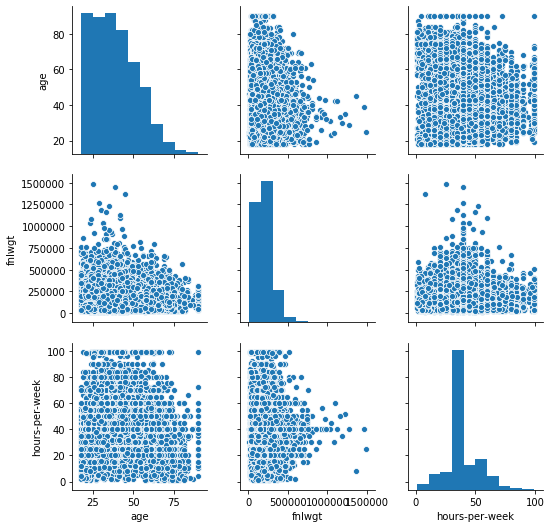

In [98]:
# correlation between numeric features
sns.pairplot(copy_df[num_cols])

In [99]:
copy_df[num_cols].corr()

,age,fnlwgt,hours-per-week
age,1.000000,-0.079375,0.039007
fnlwgt,-0.079375,1.000000,-0.021169
hours-per-week,0.039007,-0.021169,1.000000


**Observation from above:**  
No pair of numeric variables have strong correlations.

# Feature Engineering

Part 1: Feature selection
- based on the findings in correlation analysis  
- based on additional criteria

Part 2: Skewnewss

Part 3: Encoding

## Feature Selection

In [61]:
# remove fnlwgt
copy_df.drop('fnlwgt', axis=1, inplace=True)
# create a dummy variable to indicate if a person's education level is above bachelor degree
copy_df['bachelor_above'] = 0
copy_df.loc[copy_df['education-num'] >= 13, 'bachelor_above'] = 1
copy_df.head()

,age,workclass,education-num,status,occupation,relationship,race,sex,hours-per-week,income-class,capital-gain-zero,capital-loss-zero,is_USA,no_pay_or_work,bachelor_above
0,39,7.0,13,4.0,1.0,1.0,4.0,1.0,40,0,0,1,1,0,1
1,50,6.0,13,2.0,4.0,0.0,4.0,1.0,13,0,1,1,1,0,1
2,38,4.0,9,0.0,6.0,1.0,4.0,1.0,40,0,1,1,1,0,0
3,53,4.0,7,2.0,6.0,0.0,2.0,1.0,40,0,1,1,1,0,0
4,28,4.0,13,2.0,10.0,5.0,2.0,0.0,40,0,1,1,0,0,1


In [63]:
# remove variables where the variace is below a certain threshold
print('shape before: %s' % str(copy_df.shape))
selector = VarianceThreshold()
features = copy_df.drop('income-class', axis=1).columns
copy_df[features] = selector.fit_transform(copy_df[features])
print('shape after: %s' % str(copy_df.shape))

shape before: (32561, 15)
shape after: (32561, 15)


## Skewness

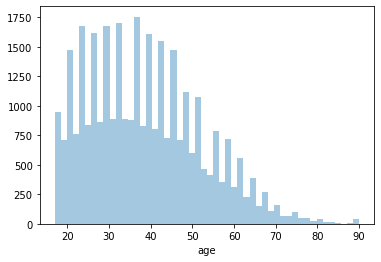

In [65]:
# distribution of age is very skewed
sns.distplot(copy_df['age'], kde=False)

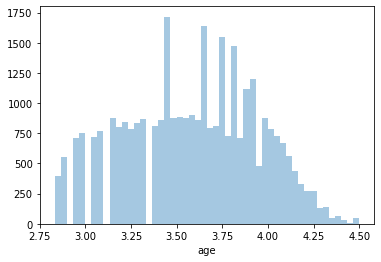

In [66]:
sns.distplot(np.log(copy_df['age']), kde=False)

In [67]:
# skewness is reduced by applying log transform even though it's still not a perfect bell shape
print(copy_df['age'].skew())
print(np.log(copy_df['age']).skew())

0.5587433694130484
-0.1317299194198282


In [71]:
# apply log transform to age
copy_df['age'] = np.log(copy_df['age'])

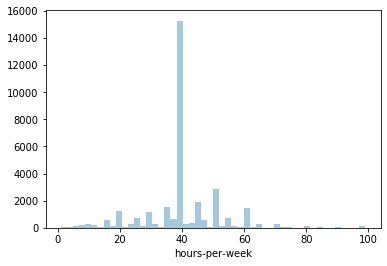

In [68]:
# distribution of hours-per-week is not as skewed
sns.distplot(copy_df['hours-per-week'], kde=False)

In [69]:
copy_df['hours-per-week'].skew()

0.22764253680450092

In [85]:
# save a checkpoint
# ordinal encoded, imbalanced
#copy_df.to_csv('adult_oe_im.csv', index=False)

## Encoding

In [75]:
# Apply one hot encoding for modeling purposes
ohe_cols = ['workclass', 'status', 'occupation', 'relationship', 'race', 'sex']
ohe_df = pd.get_dummies(data=copy_df, columns=ohe_cols)
ohe_df.head()

,age,education-num,hours-per-week,income-class,capital-gain-zero,capital-loss-zero,is_USA,no_pay_or_work,bachelor_above,workclass_0.0,...,relationship_3.0,relationship_4.0,relationship_5.0,race_0.0,race_1.0,race_2.0,race_3.0,race_4.0,sex_0.0,sex_1.0
0,3.663562,13.0,40.0,0,0.0,1.0,1.0,0.0,1.0,0,...,0,0,0,0,0,0,0,1,0,1
1,3.912023,13.0,13.0,0,1.0,1.0,1.0,0.0,1.0,0,...,0,0,0,0,0,0,0,1,0,1
2,3.637586,9.0,40.0,0,1.0,1.0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,3.970292,7.0,40.0,0,1.0,1.0,1.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,1
4,3.332205,13.0,40.0,0,1.0,1.0,0.0,0.0,1.0,0,...,0,0,1,0,0,1,0,0,1,0


In [84]:
# save a checkpoint
# one hot encoded, imbalanced
#ohe_df.to_csv('adult_ohe_im.csv', index=False)